# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data

t: time  
f: failures  
cum_f: cumulative failures

In [2]:
data = np.loadtxt('J2.csv', delimiter=',', skiprows=1, dtype=int)

In [3]:
t = data[:, 0]
# f = data[:, 1]
cum_f = data[:, 2]

# Laplace Trend

Calculation of Laplace Trend Values

In [4]:
def laplace_trend(t, cum_f):
    laplace = -((np.sum(cum_f) - ((t + 1) / 2) * cum_f[-1])
                / np.sqrt(((t**2 - 1) / 12) * cum_f[-1]))
    return laplace

laplace_trend_values = []
for i in range(len(t)):
    laplace_trend_values.append(laplace_trend(t[i], cum_f[:i+1]))

laplace_trend_values = np.array(laplace_trend_values)
laplace_trend_values = np.nan_to_num(laplace_trend_values, nan=0.0)

print("Laplace Trend Values:", laplace_trend_values)

Laplace Trend Values: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.34164079e+00
  1.50000000e+00  1.52127766e+00  8.66025404e-01  3.77964473e-01
 -0.00000000e+00 -3.01511345e-01  3.16227766e-01  1.80658137e+00
  1.31319831e+00  2.65524945e+00  2.09358947e+00  1.60247135e+00
  1.16936916e+00  1.63048769e+00  1.61023512e+00  1.20507341e+00
  8.38598088e-01  9.15701544e-01  5.83874208e-01  2.79751442e-01
 -0.00000000e+00  5.65916458e-01  2.80248297e-01  7.81026259e-01
  4.93567647e-01  9.45436571e-01  1.00113572e+00  7.15818898e-01
  4.47811076e-01  5.41970806e-01  1.26219541e+00  1.86798348e+00
  1.56527657e+00  2.11180476e+00  1.80630748e+00  2.55557368e+00
  2.48707081e+00  3.78104383e+00  3.63978735e+00  3.29288639e+00
  2.96141191e+00  2.64435703e+00  2.34080068e+00  2.27760555e+00
  1.99131265e+00  1.71647650e+00  1.45242273e+00  1.19852891e+00
  9.54219638e-01  9.59281966e-01  9.63795682e-01  9.67805152e-01
  1.42451703e+00  2.05147533e+00  2.61543825e+00  3.85830754e+00
  4

/tmp/ipykernel_76453/3811906286.py:2: RuntimeWarning: invalid value encountered in scalar divide
  laplace = -((np.sum(cum_f) - ((t + 1) / 2) * cum_f[-1])


# Visualization of Laplace Trend and SRGMs

Prepare SRGM Functions

In [5]:
# Goel-Okumoto Model
def goel_okumoto(t, a, b):
    return a * (1 - np.exp(-b * t))


# Delayed S-Shaped Model
def delayed_s(t, a, b):
    return a * (1 - (1 + b * t) * np.exp(-b * t))


# Inflection S-Shaped Model
def inflection_s(t, a, b, c):
    return a * (1 - np.exp(-b * t)) / (1 + c * np.exp(-b * t))


# Weibull Model
def weibull(t, a, b, c):
    return a * (1 - np.exp(-b * t**c))


# Log-Logistic Model
def log_logistic(t, a, b, c):
    return a * (b * t)**c / (1 + (b * t)**c)

Setting of Optimal Parameters

In [6]:
# Goel-Okumoto parameters
go_a = 1089.8443934742647
go_b = 0.0015011864551625193

# Delayed S-Shaped parameters
dss_a = 291.9070760043226
dss_b = 0.018430237885917685

# Inflection S-Shaped parameters
iss_a = 226.93370835706764
iss_b = 0.05401184489784803
iss_c = 59.62356729487018

# Weibull parameters
we_a = 224.00002914548196
we_b = 1.9356747234673253e-06
we_c = 2.957144382679132

# Log-Logistic parameters
ll_a = 240.9273993576127
ll_b = 0.012992696706592892
ll_c = 3.761552542313322

Prepare SRGM Graph Data

In [7]:
goel_okumoto_values = goel_okumoto(t, go_a, go_b)
delayed_s_values = delayed_s(t, dss_a, dss_b)
inflection_s_values = inflection_s(t, iss_a, iss_b, iss_c)
weibull_values = weibull(t, we_a, we_b, we_c)
log_logistic_values = log_logistic(t, ll_a, ll_b, ll_c)

goel_okumoto_values = np.insert(goel_okumoto_values, 0, 0)
delayed_s_values = np.insert(delayed_s_values, 0, 0)
inflection_s_values = np.insert(inflection_s_values, 0, 0)
weibull_values = np.insert(weibull_values, 0, 0)
log_logistic_values = np.insert(log_logistic_values, 0, 0)

Plot Laplace Trend and SRGM Graphs

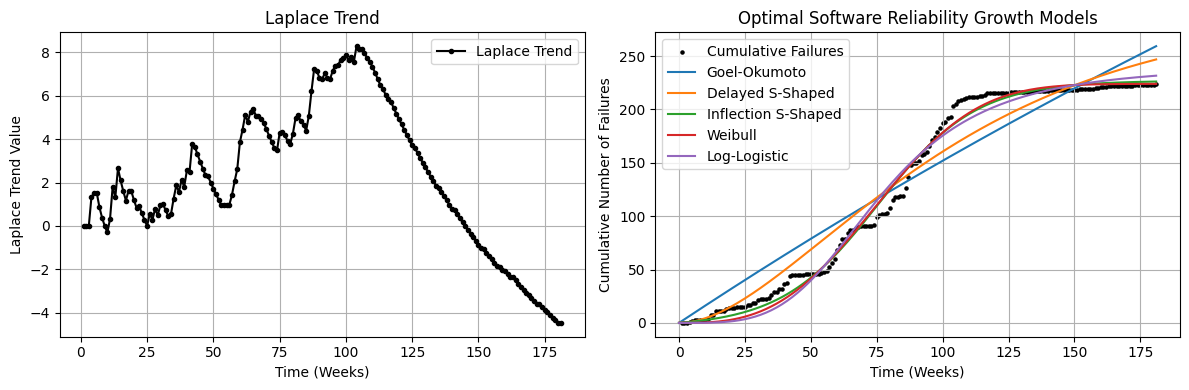

In [8]:
t_add_zero = np.insert(t, 0, 0)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(t, laplace_trend_values,
             label='Laplace Trend', color='black', marker='.')
axes[0].set_title('Laplace Trend')
axes[0].set_xlabel('Time (Weeks)')
axes[0].set_ylabel('Laplace Trend Value')
axes[0].legend()
axes[0].grid()

axes[1].scatter(t, cum_f, label='Cumulative Failures', color='black', s=5)
axes[1].plot(t_add_zero, goel_okumoto_values, label='Goel-Okumoto')
axes[1].plot(t_add_zero, delayed_s_values, label='Delayed S-Shaped')
axes[1].plot(t_add_zero, inflection_s_values, label='Inflection S-Shaped')
axes[1].plot(t_add_zero, weibull_values, label='Weibull')
axes[1].plot(t_add_zero, log_logistic_values, label='Log-Logistic')
axes[1].set_title('Optimal Software Reliability Growth Models')
axes[1].set_xlabel('Time (Weeks)')
axes[1].set_ylabel('Cumulative Number of Failures')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.savefig('.img/laplace_trend_and_srgms.png', dpi=300, bbox_inches='tight')